In [34]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time

# File reading things
import pickle
import json
import csv

# The "requests" library makes working with HTTP requests easier
import requests
import os
from bs4 import BeautifulSoup
from IPython.display import Image, display # Display image from URL
from IPython.core.display import HTML # Display image from URL

# TMDB API wrapper
import tmdbsimple as tmdb

# IMDB access
import imdb

#visualization package
import seaborn as sns # Seaborn visualization package

# Display options
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline

In [72]:
#load data
os.chdir('/Users/Cynthia9109/Documents/Harvard_Stat/Spring_2017/STAT121B/Project/cs109b-best-group-master')
#raw data
movie = pd.read_csv("top_100_2016_data.csv")
#data with encoded genres
movie_encoded = pd.read_csv("top_100_2016_onehot_genres.csv")


In [7]:
movie.head(5)

,poster_path,title,overview,popularity,original_title,backdrop_path,vote_count,video,adult,vote_average,original_language,id,genre_ids
0,/s9ye87pvq2IaDvjv9x4IOXVjvA7.jpg,Sing,A koala named Buster recruits his best friend ...,99.310355,Sing,/fxDXp8un4qNY9b1dLd7SH6CKzC.jpg,1000,False,False,6.7,en,335797,"[16, 35, 18, 10751, 10402]"
1,/gri0DDxsERr6B2sOR1fGLxLpSLx.jpg,Fantastic Beasts and Where to Find Them,"In 1926, Newt Scamander arrives at the Magical...",50.057262,Fantastic Beasts and Where to Find Them,/kMzU4PkXcKcDMngCxXji0BbVXsu.jpg,3097,False,False,7.0,en,259316,"[12, 28, 14]"
2,/z09QAf8WbZncbitewNk6lKYMZsh.jpg,Finding Dory,Dory is reunited with her friends Nemo and Mar...,40.820013,Finding Dory,/iWRKYHTFlsrxQtfQqFOQyceL83P.jpg,2899,False,False,6.7,en,127380,"[12, 16, 35, 10751]"
3,/inVq3FRqcYIRl2la8iZikYYxFNR.jpg,Deadpool,Based upon Marvel Comics’ most unconventional ...,29.195660,Deadpool,/n1y094tVDFATSzkTnFxoGZ1qNsG.jpg,7607,False,False,7.3,en,293660,"[28, 12, 35, 10749]"
4,/qjiskwlV1qQzRCjpV0cL9pEMF9a.jpg,Rogue One: A Star Wars Story,A rogue band of resistance fighters unite for ...,29.058190,Rogue One: A Star Wars Story,/tZjVVIYXACV4IIIhXeIM59ytqwS.jpg,2909,False,False,7.3,en,330459,"[28, 18, 878, 10752]"


In [8]:
movie_encoded.head(5)

,Unnamed: 0,poster_path,title,release_date,overview,popularity,original_title,backdrop_path,vote_count,video,adult,vote_average,original_language,id,genre_ids,12,14,16,18,27,28,35,36,37,53,80,878,9648,10402,10749,10751,10752
0,0,/s9ye87pvq2IaDvjv9x4IOXVjvA7.jpg,Sing,2016-11-23,A koala named Buster recruits his best friend ...,99.310355,Sing,/fxDXp8un4qNY9b1dLd7SH6CKzC.jpg,1000,False,False,6.7,en,335797,"[16, 35, 18, 10751, 10402]",0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,/gri0DDxsERr6B2sOR1fGLxLpSLx.jpg,Fantastic Beasts and Where to Find Them,2016-11-16,"In 1926, Newt Scamander arrives at the Magical...",50.057262,Fantastic Beasts and Where to Find Them,/kMzU4PkXcKcDMngCxXji0BbVXsu.jpg,3097,False,False,7.0,en,259316,"[12, 28, 14]",1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,/z09QAf8WbZncbitewNk6lKYMZsh.jpg,Finding Dory,2016-06-16,Dory is reunited with her friends Nemo and Mar...,40.820013,Finding Dory,/iWRKYHTFlsrxQtfQqFOQyceL83P.jpg,2899,False,False,6.7,en,127380,"[12, 16, 35, 10751]",1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,/inVq3FRqcYIRl2la8iZikYYxFNR.jpg,Deadpool,2016-02-09,Based upon Marvel Comics’ most unconventional ...,29.195660,Deadpool,/n1y094tVDFATSzkTnFxoGZ1qNsG.jpg,7607,False,False,7.3,en,293660,"[28, 12, 35, 10749]",1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,/qjiskwlV1qQzRCjpV0cL9pEMF9a.jpg,Rogue One: A Star Wars Story,2016-12-14,A rogue band of resistance fighters unite for ...,29.058190,Rogue One: A Star Wars Story,/tZjVVIYXACV4IIIhXeIM59ytqwS.jpg,2909,False,False,7.3,en,330459,"[28, 18, 878, 10752]",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [54]:
#sort movies by popularity in 2016
movie_sorted = movie.sort_values(by = ['popularity'], ascending = False)

#print the top 10 movie in 2016
movie_sorted['original_title'][:20]

0                                            Sing
1         Fantastic Beasts and Where to Find Them
2                                    Finding Dory
3                                        Deadpool
4                    Rogue One: A Star Wars Story
5                                         Arrival
6                                  Doctor Strange
7                      Captain America: Civil War
8                          Underworld: Blood Wars
9                                        Zootopia
10                                 Hidden Figures
11                                  Hacksaw Ridge
12                                     Passengers
13                               Assassin's Creed
14                                           Lion
15                              X-Men: Apocalypse
16                              Deepwater Horizon
17    Miss Peregrine's Home for Peculiar Children
18                                   Patriots Day
19                                 The Accountant


In [142]:
genre = movie_encoded.iloc[:, -17:]

map(int, genre.columns)
genre.columns = map(int, genre.columns)

#change title names to reflect genre
# read the genre list
genre_names = pd.read_csv("genre_list.csv")
# conver the dataframe into a dictionary
genre_names = genre_names.set_index("id")
genre_name_dict = genre_names.to_dict()['GenreName']

# match genre name to the id (using the genre dictionary from above)
genre = genre.rename(columns = genre_name_dict)

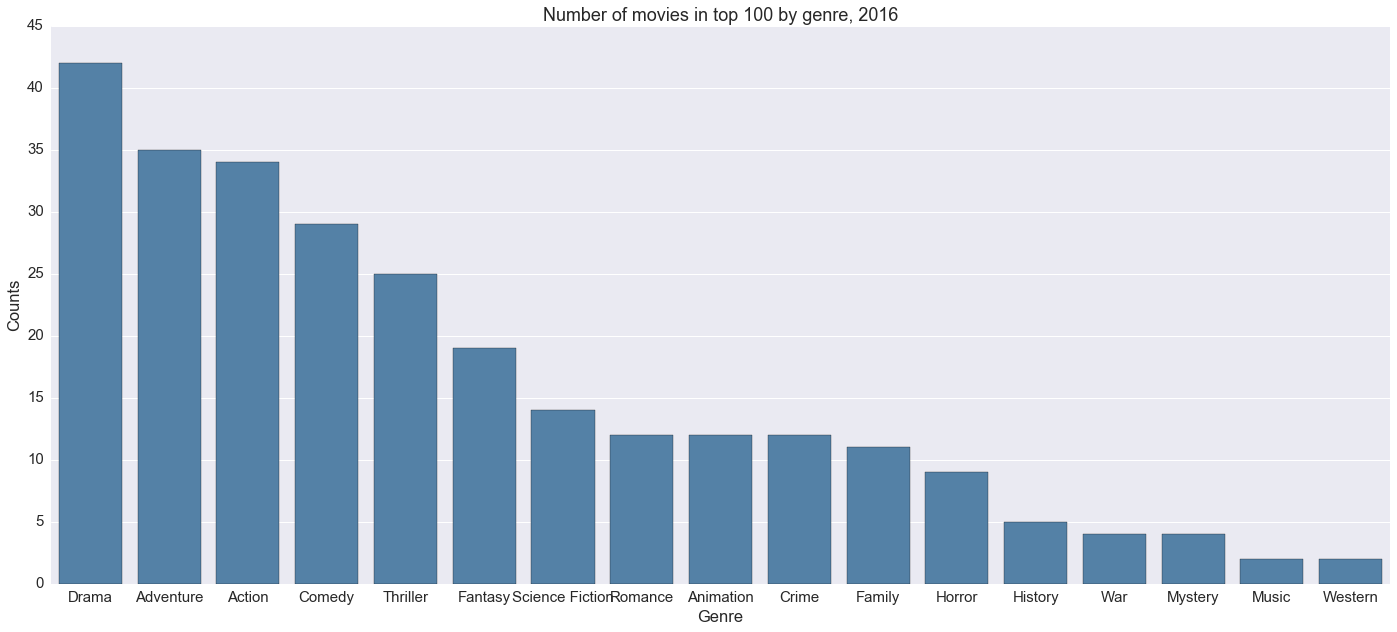

In [145]:

#count movies per genre
count = genre.sum(axis=0)
count_sorted = count.sort_values(ascending = False)

sns.set(font_scale=1.5)
sns.set_context({"figure.figsize": (24, 10)})
plt.figure()
sns.barplot(x = count_sorted.index, 
            y = count_sorted.values, 
            color = "steelblue")

plt.xlabel('Genre')
plt.ylabel('Counts')
plt.title('Number of movies in top 100 by genre, 2016')


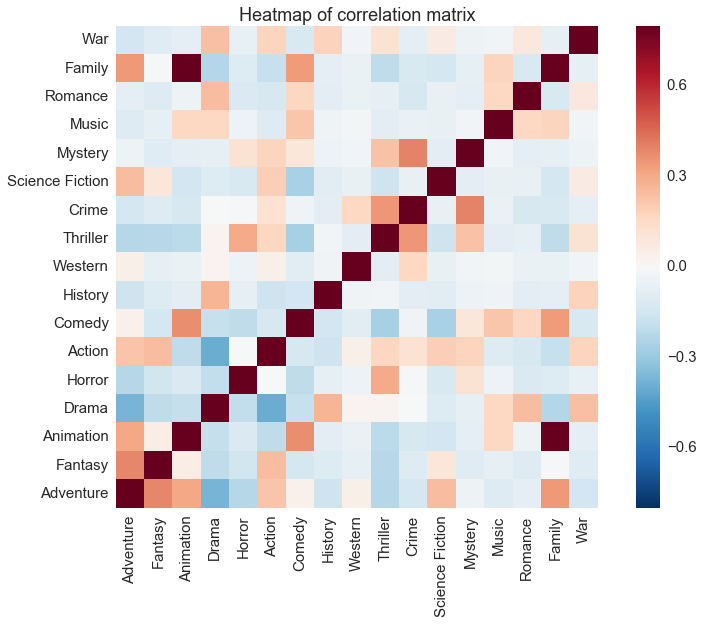

In [146]:
# Compute matrix of correlation coefficients
corrmat = genre.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
ax.invert_yaxis()
ax.set_title('Heatmap of correlation matrix')

# # Use matplotlib directly to emphasize known networks
# networks = corrmat.columns.get_level_values("network")
# for i, network in enumerate(networks):
#     if i and network != networks[i - 1]:
#         ax.axhline(len(networks) - i, c="w")
#         ax.axvline(i, c="w")

f.tight_layout()
plt.show()


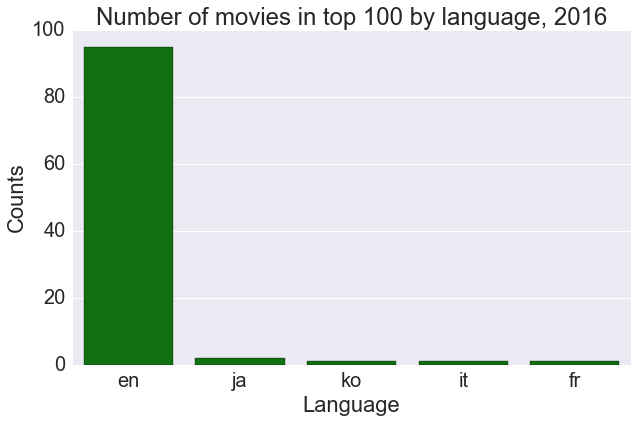

In [53]:
count_bylanguage = movie_encoded['original_language'].value_counts()

sns.set(font_scale=2)
sns.set_context({"figure.figsize": (10, 6)})
plt.figure()
sns.barplot(x = count_bylanguage.index, 
            y = count_bylanguage.values, 
            color = "green")

plt.xlabel('Language')
plt.ylabel('Counts')
plt.title('Number of movies in top 100 by language, 2016')

for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


In [ ]:
import requests

url = "https://api.themoviedb.org/3/genre/movie/list?api_key=344c6c32f61c6ea64f167a1eeac3653b&language=en-US"

payload = "{}"
response = requests.request("GET", url, data=payload)

# reformat the result
movie_genres = response.json()
movie_genres = movie_genres["genres"]

# now the genres are in a dictionary
for i in range(len(movie_genres)):
    print "id: ", movie_genres[i]["id"], "; Genre name: ", movie_genres[i]["name"]